In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
student = pd.read_csv('data/StudentsPerformance.csv')
student.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
# Group to Number
groups = sorted(student['race/ethnicity'].unique())
gton = dict(zip(groups , range(5)))

# Group에 따라 색 1, 2, 3, 4, 5
student['color'] = student['race/ethnicity'].map(gton)
student

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,color
0,female,group B,bachelor's degree,standard,none,72,72,74,1
1,female,group C,some college,standard,completed,69,90,88,2
2,female,group B,master's degree,standard,none,90,95,93,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,0
4,male,group C,some college,standard,none,76,78,75,2
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,4
996,male,group C,high school,free/reduced,none,62,55,55,2
997,female,group C,high school,free/reduced,completed,59,71,65,2
998,female,group D,some college,standard,completed,68,78,77,3


In [6]:
# color list to color map
print(plt.cm.get_cmap('tab10').colors)

((0.12156862745098039, 0.4666666666666667, 0.7058823529411765), (1.0, 0.4980392156862745, 0.054901960784313725), (0.17254901960784313, 0.6274509803921569, 0.17254901960784313), (0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (0.5803921568627451, 0.403921568627451, 0.7411764705882353), (0.5490196078431373, 0.33725490196078434, 0.29411764705882354), (0.8901960784313725, 0.4666666666666667, 0.7607843137254902), (0.4980392156862745, 0.4980392156862745, 0.4980392156862745), (0.7372549019607844, 0.7411764705882353, 0.13333333333333333), (0.09019607843137255, 0.7450980392156863, 0.8117647058823529))


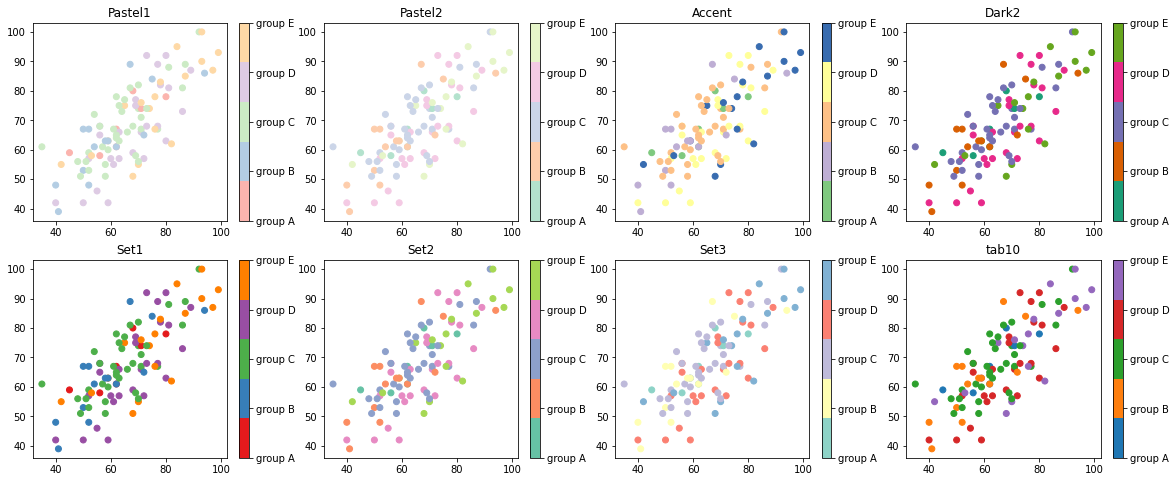

In [15]:
from matplotlib.colors import ListedColormap

qualitative_cm_list = ['Pastel1', 'Pastel2', 'Accent', 'Dark2', 'Set1', 'Set2', 'Set3', 'tab10']

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()

student_sub = student.sample(100)

for idx, cm in enumerate(qualitative_cm_list):    
    pcm = axes[idx].scatter(student_sub['math score'], student_sub['reading score'],
                     c=student_sub['color'], cmap=ListedColormap(plt.cm.get_cmap(cm).colors[:5]))
    cbar = fig.colorbar(pcm, ax=axes[idx], ticks=range(5))
    cbar.ax.set_yticklabels(groups)
    axes[idx].set_title(cm)
    
plt.show()